In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = glob.glob('processed/city_occ_employment/*.csv')

employment = pd.DataFrame()
city_shares = pd.DataFrame()

area = 'COMZONE'

for file in files:
    year = int(os.path.basename(file)[-8:-4])
    current = pd.read_csv(file)
    current.set_index(area, inplace=True)
    current.loc[year] = current.sum(axis=0)
    current[year] = current.sum(axis=1)
    employment = pd.concat([employment, current.loc[year].drop(year)], axis=1)
    city_shares = pd.concat([city_shares, current[year].drop(year)], axis=1)

employment.loc['total'] = employment.sum(axis=0)
employment = employment.div(employment.loc['total'], axis=1)
employment.drop(['total', 'other'], inplace=True)
employment = employment.sort_index(axis=1).T

city_shares = city_shares.drop(1970, axis=1)
# city_shares = city_shares[~city_shares.index.str.startswith('Not identifiable')]
city_shares.sort_index(axis=1, inplace=True)
city_shares.loc['year_total'] = city_shares.sum(axis=0)
city_shares = city_shares.div(city_shares.loc['year_total'], axis=1)
city_shares = city_shares.drop('year_total')
city_shares = city_shares.loc[city_shares[1980].sort_values(ascending=False).index[:10]]
city_shares = city_shares.pct_change(axis=1).dropna(axis=1)

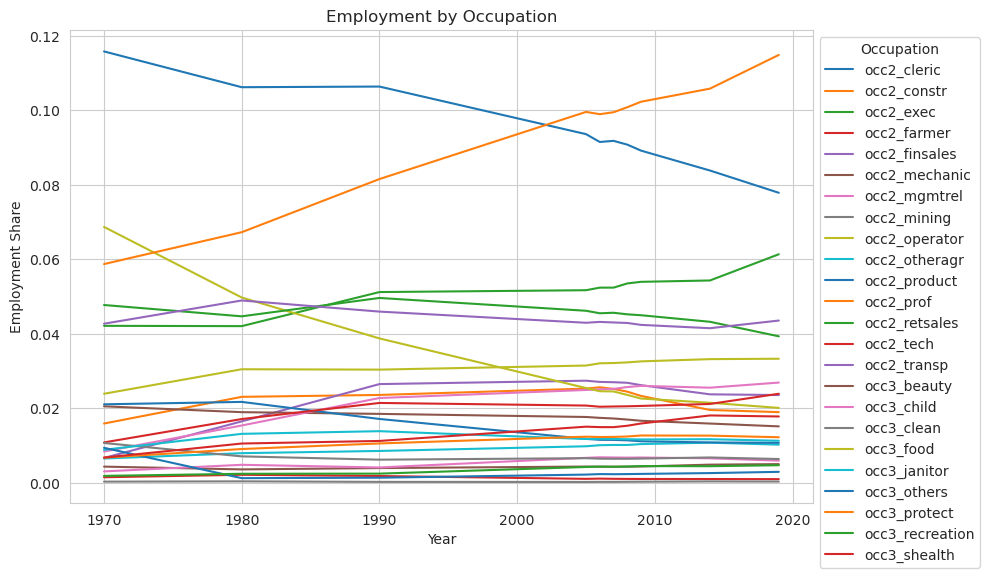

In [3]:
sns.set_style('whitegrid')

employment.plot(kind='line', figsize=(10, 6))
plt.title('Employment by Occupation')
plt.ylabel('Employment Share')
plt.xlabel('Year')
plt.legend(title='Occupation', bbox_to_anchor=(1, 1))
# plt.legend().set_visible(False)
plt.tight_layout()
# plt.savefig('graphs/omega_k.png')
plt.show()

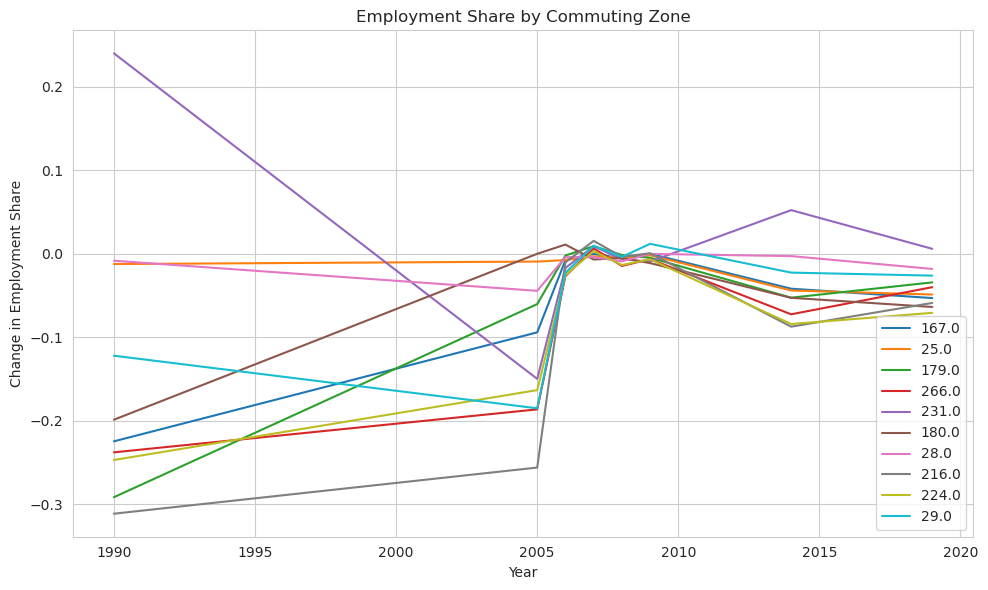

In [4]:
city_shares.T.plot(kind='line', figsize=(10, 6))
plt.title('Employment Share by Commuting Zone')
plt.ylabel('Change in Employment Share')
plt.xlabel('Year')
# plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.tight_layout()
# plt.savefig('graphs/pi_c.png')
plt.show()